In [1]:
%matplotlib inline
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cmocean
import cartopy.crs as ccrs
from scipy.io import loadmat
import mat73
 
# additional configuration (optional)
%config InlineBackend.figure_format = 'retina'

from dask.distributed import Client #client is the interface to
from dask.distributed import LocalCluster #Start the cluster locally
cluster = LocalCluster()
client = Client(cluster) #Connect the client to the c
client

<Client: 'tcp://127.0.0.1:46811' processes=4 threads=8, memory=33.22 GB>

### Load in piControl and WOA18 T and S fields

In [2]:
## Load in static fields
ds_static_esm4 = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/ESM4/piControl/ocean_monthly.static.nc')
ds_static_cm4 = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/piControl_output/ocean_annual.static.nc')

## Control data -- ESM4, only load in years 121 - 220
ds_potorho_esm4_piControl = xr.open_dataset('/net/Rebecca.Beadling/southern_ocean_fafmip/Figures/Ensemble-Means/CM4/1000m_isobath_transports/esm4_potential_density_ref_to_surf_100yr_ave_121_220.nc').sel(yh=slice(-90,-30))
ds_thetao_esm4_piControl = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/ESM4/piControl/ocean_annual_z.0101-0270.thetao.nc',
                                           chunks={'time':10,'z_l':1},drop_variables=['average_DT', 'average_T1', 'average_T2'],use_cftime=True).sel(yh=slice(-90,-30)).sel(time=slice('0121-01-16','0220-12-16')).mean(dim='time')
ds_so_esm4_piControl = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/ESM4/piControl/ocean_annual_z.0101-0270.so.nc',
                                           chunks={'time':10,'z_l':1},drop_variables=['average_DT', 'average_T1', 'average_T2'],use_cftime=True).sel(yh=slice(-90,-30)).sel(time=slice('0121-01-16','0220-12-16')).mean(dim='time')
ds_vol_esm4_piControl = xr.open_dataset('/archive/oar.gfdl.cmip6/ESM4/DECK/ESM4_piControl_D/gfdl.ncrc4-intel16-prod-openmp/pp/ocean_annual_z/ts/annual/5yr/ocean_annual_z.0001-0005.volcello.nc',
                                           chunks={'time':1,'z_l':1},drop_variables=['average_DT', 'average_T1', 'average_T2'],use_cftime=True).sel(yh=slice(-90,-30)).isel(time=0)


## Control data -- CM4, only load in years 281 - 380
ds_potorho_cm4_piControl = xr.open_dataset('/net/Rebecca.Beadling/southern_ocean_fafmip/Figures/Ensemble-Means/CM4/1000m_isobath_transports/cm4_potential_density_ref_to_surf_100yr_ave_281_380.nc').sel(yh=slice(-90,-30))
ds_thetao_cm4_piControl = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/piControl_output/ocean_annual_z.0251-0405.thetao.nc',
                                        chunks={'time':10,'z_l':1},drop_variables=['average_DT', 'average_T1', 'average_T2'],use_cftime=True).sel(yh=slice(-90,-30)).sel(time=slice('0281-01-16','0380-12-16')).mean(dim='time')
ds_so_cm4_piControl = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/piControl_output/ocean_annual_z.0251-0405.so.nc',
                                        chunks={'time':10,'z_l':1},drop_variables=['average_DT', 'average_T1', 'average_T2'],use_cftime=True).sel(yh=slice(-90,-30)).sel(time=slice('0281-01-16','0380-12-16')).mean(dim='time')
ds_vol_cm4_piControl = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/piControl_output/ocean_annual_z.0251-0380.volcello.nc',
                                        chunks={'time':10,'z_l':1},drop_variables=['average_DT', 'average_T1', 'average_T2'],use_cftime=True).sel(yh=slice(-90,-30)).isel(time=0)


## WOA18 fields on 0.25 grid  - full decadal averages:
ds_woa18_T = xr.open_dataset('/archive/Rebecca.Beadling/WOA18/woa18_decav_t00_04.nc',decode_times=False)
ds_woa18_S = xr.open_dataset('/archive/Rebecca.Beadling/WOA18/woa18_decav_s00_04.nc',decode_times=False)

## Load in SOSE 1/12 T & S fields:
## Read in .mat files as python dictionaries
## Dictionaries are used to store data in key:va lue pairs
## A collection which is ordered.
dict_salt = mat73.loadmat('/archive/Rebecca.Beadling/SOSE_to_transfer_new/SaltForEllyn.mat')
dict_thetao = mat73.loadmat('/archive/Rebecca.Beadling/SOSE_to_transfer_new/ThetaForEllyn.mat')
dict_grid = mat73.loadmat('/archive/Rebecca.Beadling/SOSE_to_transfer_new/grid.mat')

In [3]:
dict_salt

{'S': array([[[ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
           0.      ],
         [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
           0.      ],
         [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
           0.      ],
         ...,
         [33.623543, 33.62475 , 33.62574 , ..., 34.65131 ,  0.      ,
           0.      ],
         [33.62259 , 33.6238  , 33.62479 , ..., 34.65131 ,  0.      ,
           0.      ],
         [33.622074, 33.623306, 33.624275, ...,  0.      ,  0.      ,
           0.      ]],
 
        [[ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
           0.      ],
         [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
           0.      ],
         [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
           0.      ],
         ...,
         [33.62261 , 33.623863, 33.624805, ..., 34.65131 ,  0.      ,
           0.      ],
         [33.621716, 33.622936, 33.623905, .

In [4]:
salt_sose = xr.DataArray(dict_salt["S"],dims={"xc":dict_salt["xc"], "yc":dict_salt["yc"], "z":dict_salt["z"]})
salt_sose = salt_sose.assign_coords({"xc":dict_salt["xc"], "yc":dict_salt["yc"], "z":dict_salt["z"]})
salt_sose = salt_sose.transpose("z","yc","xc")

thetao_sose = xr.DataArray(dict_thetao["T"],dims={"xc":dict_thetao["xc"], "yc":dict_thetao["yc"], "z":dict_thetao["z"]})
thetao_sose = thetao_sose.assign_coords({"xc":dict_thetao["xc"], "yc":dict_thetao["yc"], "z":dict_thetao["z"]})
thetao_sose = thetao_sose.transpose("z","yc","xc")



### Need to slice Depth to 643 points
#sose_depth = xr.DataArray(dict_grid["Depth"],dims={"xg":uvel["xg"], "yc":uvel["yc"]})
#sose_depth = sose_depth.transpose("yc","xg")
## Slice depth before I assign coords
#sose_depth_slice = sose_depth.isel(yc=slice(0,643))
#sose_depth_slice = sose_depth_slice.assign_coords({"xg":uvel["xg"],"yc":uvel["yc"]})

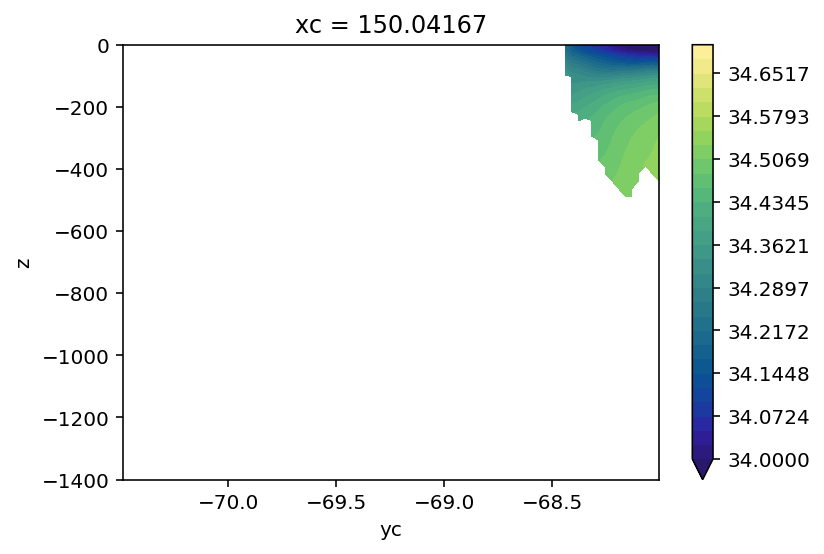

In [13]:
salt_sose.where(salt_sose != 0).sel(xc=150,method='nearest').sel(yc=slice(-70.5,-68)).plot.contourf(vmin=34.0,vmax=34.70,levels=30,ylim=(-1400,0),cmap=cmocean.cm.haline)

### Function to produce correct model bathymetry taking into account partial cells using grid cell thickness

In [6]:
def true_bathymetry(region_area,region_volcello):
    area = region_area.values
    vol = region_volcello.values
    thickness = vol/area
    
    z_l = region_volcello['z_l'].values    
    lat = region_volcello['yh'].values
    
    ## Get depth to center of the partial cells:
    kmax = thickness.shape[0]  ##Maximum k value, == 35
    zl  = 0.0 * thickness[:]   ## Take all the values for thickness at 20e and multiply by zero. 
    zl[0] = 0.5 * thickness[0]                                                             

    k = 1
    while k < kmax:
        zl[k] = zl[k-1] + 0.5 * (thickness[k]+thickness[k-1])
        k=k+1
    
    zl_nm = np.array(zl)
    arr = zl_nm
    
    def forward_fill(arr):
        """ Forward fill a 2-D array along the column dimension"""
        # make a copy of the input array
        out = arr * 1.0
        # loop over column index
        for col_idx in range(0,arr.shape[1]):
            # get the column to work on
            _row = arr[:,col_idx]
            # get index numbers of nan values
            _nan_vals = np.argwhere(np.isnan(_row))
            # find the last "good" value
            _depth = 0. if _nan_vals[0] == 0 else _row[_nan_vals[0]-1]
            # set nan values to the last good value
            _row = np.where(np.isnan(_row),_depth,_row)
            # re-assign the filled column
            out[:,col_idx] = _row
    
        return out
    
    zl_new = forward_fill(arr)

   # Broadcast lat to zl
    lat = np.broadcast_to(lat,zl_new.shape)
    
    return zl_new,lat

### Return arrays of zl and lat for each region to use for plotting true bathymetry

In [7]:
cm4_piControl_true_bathy_20e = true_bathymetry\
                        (ds_static_cm4.areacello.sel(yh=slice(-70.5,-68)).sel(xh=20,method='nearest'),\
                         ds_vol_cm4_piControl.volcello.sel(yh=slice(-70.5,-68)).sel(xh=20,method='nearest'))
cm4_piControl_true_bathy_150e = true_bathymetry\
                        (ds_static_cm4.areacello.sel(yh=slice(-69,-65.2)).sel(xh=-210,method='nearest'),\
                         ds_vol_cm4_piControl.volcello.sel(yh=slice(-69,-65.2)).sel(xh=-210,method='nearest'))
cm4_piControl_true_bathy_130w = true_bathymetry\
                        (ds_static_cm4.areacello.sel(yh=slice(-75,-72)).sel(xh=-130,method='nearest'),\
                         ds_vol_cm4_piControl.volcello.sel(yh=slice(-75,-72)).sel(xh=-130,method='nearest'))
cm4_piControl_true_bathy_80w = true_bathymetry\
                        (ds_static_cm4.areacello.sel(yh=slice(-74,-68)).sel(xh=-80,method='nearest'),\
                         ds_vol_cm4_piControl.volcello.sel(yh=slice(-74,-68)).sel(xh=-80,method='nearest'))

esm4_piControl_true_bathy_20e = true_bathymetry\
                        (ds_static_esm4.areacello.sel(yh=slice(-70.5,-68)).sel(xh=20,method='nearest'),\
                         ds_vol_esm4_piControl.volcello.sel(yh=slice(-70.5,-68)).sel(xh=20,method='nearest'))
esm4_piControl_true_bathy_150e = true_bathymetry\
                        (ds_static_esm4.areacello.sel(yh=slice(-69,-65.2)).sel(xh=-210,method='nearest'),\
                         ds_vol_esm4_piControl.volcello.sel(yh=slice(-69,-65.2)).sel(xh=-210,method='nearest'))
esm4_piControl_true_bathy_130w = true_bathymetry\
                        (ds_static_esm4.areacello.sel(yh=slice(-75,-72)).sel(xh=-130,method='nearest'),\
                         ds_vol_esm4_piControl.volcello.sel(yh=slice(-75,-72)).sel(xh=-130,method='nearest'))
esm4_piControl_true_bathy_80w = true_bathymetry\
                        (ds_static_esm4.areacello.sel(yh=slice(-74,-68)).sel(xh=-80,method='nearest'),\
                         ds_vol_esm4_piControl.volcello.sel(yh=slice(-74,-68)).sel(xh=-80,method='nearest'))

### Function to compute potential density referenced to the surface 

In [8]:
def pdens(S,theta):
    """Calculate potential density [in kg m-3] referenced to the surface according to the expressions from Wright 1997, J. Atmos.
    Ocean. Tech., 14, 735 - 740.
    
    This is the computation for potential density used within MOM6
    
    Parameters
    ----------
    salt : xarray.DataArray
        Data Array containing salinity in psu
    theta: xarray.DataArray
        Data Array containing potential temperature relative to the sea surface in degree C
        
    Returns
    ----------
    xarray.DataArray
        Data Array containing potential density in kg m-3"""

    # --- Define constants (Table 1 Column 4, Wright 1997, J. Ocean Tech.)---
    a0 = 7.057924e-4
    a1 = 3.480336e-7
    a2 = -1.112733e-7

    b0 = 5.790749e8
    b1 = 3.516535e6
    b2 = -4.002714e4
    b3 = 2.084372e2
    b4 = 5.944068e5
    b5 = -9.643486e3

    c0 = 1.704853e5
    c1 = 7.904722e2
    c2 = -7.984422
    c3 = 5.140652e-2
    c4 = -2.302158e2
    c5 = -3.079464

    # To compute potential density referenced to the surface keep pressure p = 100 kpa
    # S in standard salinity units psu, theta in DegC, p in pascals

    p = 100000.
    alpha0 = a0 + a1*theta + a2*S
    p0 = b0 + b1*theta + b2*theta**2 + b3*theta**3 + b4*S + b5*theta*S
    lambd = c0 + c1*theta + c2*theta**2 + c3*theta**3 + c4*S + c5*theta*S

    pot_dens = (p + p0)/(lambd + alpha0*(p + p0))

    return pot_dens - 1000

### Compute potential density referenced to surface for SOSE & WOA18

In [33]:
pdens_woa18 = pdens(ds_woa18_S.s_an,ds_woa18_T.t_an)
pdens_sose = pdens(salt_sose,thetao_sose)

<a list of 6 text.Text objects>

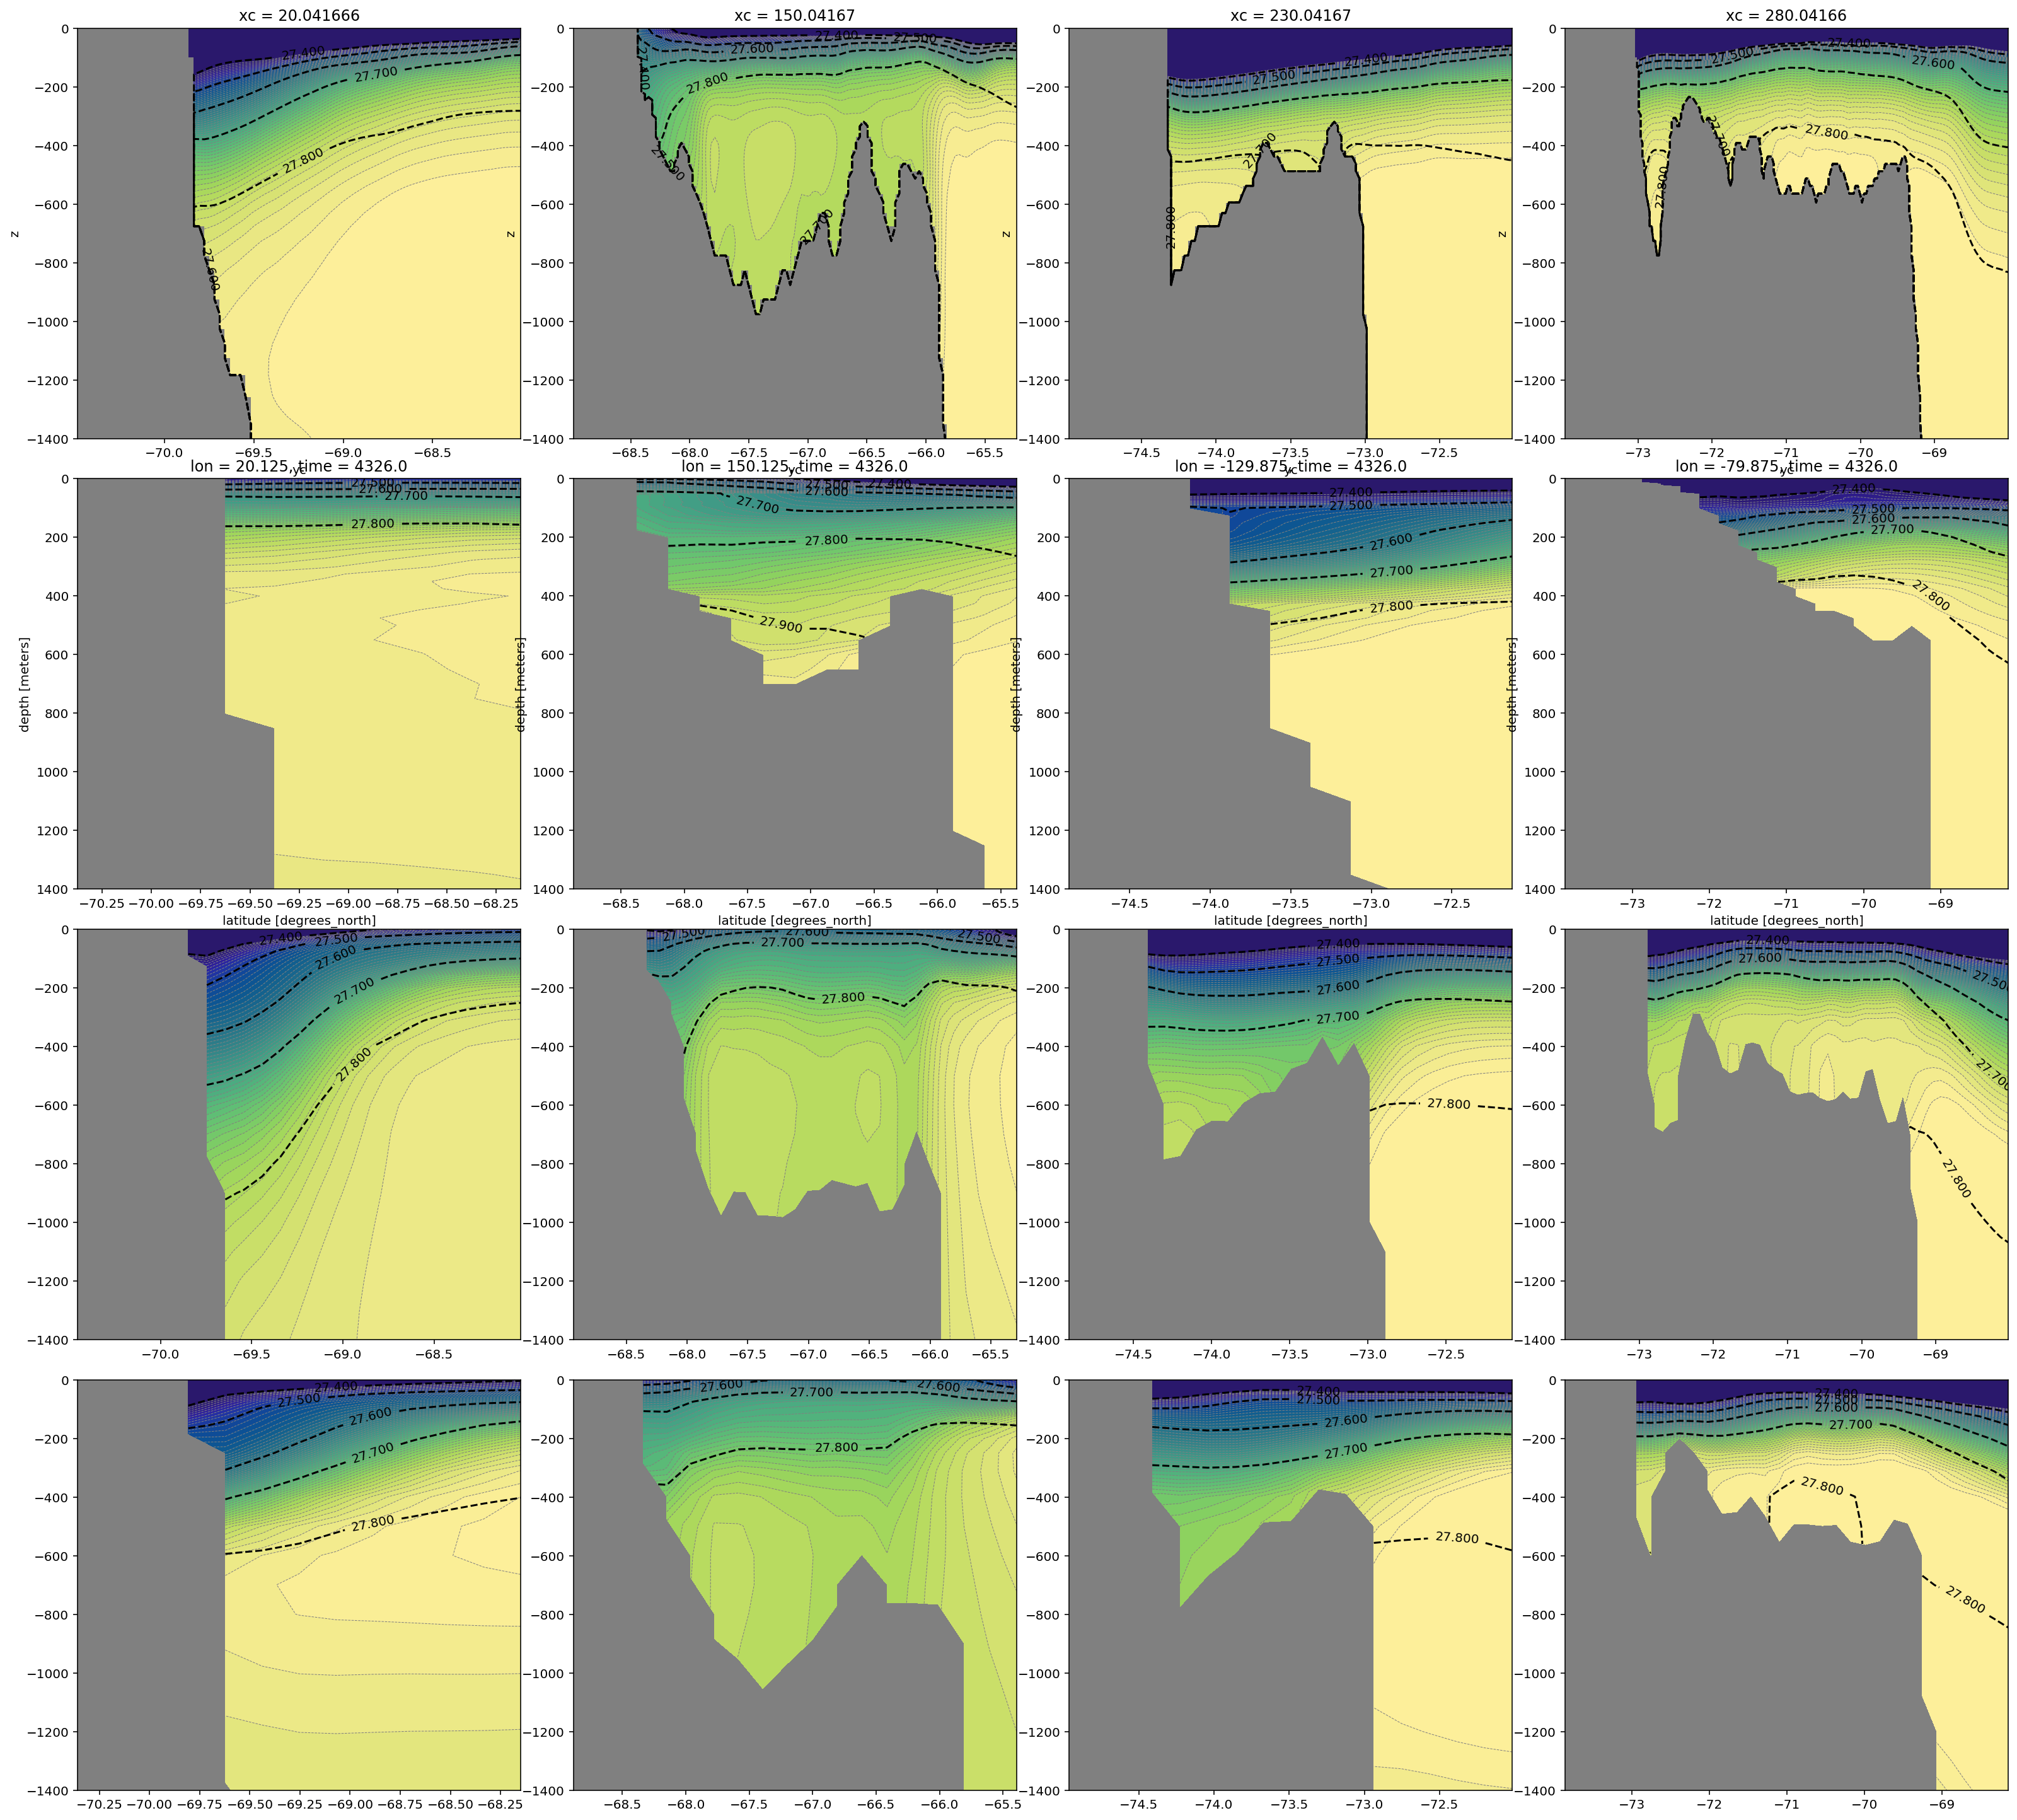

In [34]:
potorho_piControl_cm4 = ds_potorho_cm4_piControl.poto_rho_ref_surface_cm4 - 1000
potorho_piControl_esm4 = ds_potorho_esm4_piControl.poto_rho_ref_surface_esm4 - 1000

f, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12), (ax13, ax14, ax15, ax16)) = plt.subplots(ncols=4,nrows=4,figsize=(22,20),subplot_kw=dict(facecolor='grey'))
plt.tight_layout()

custom_ylim = (-1400,0)

plt.setp(ax1, ylim=custom_ylim)
plt.setp(ax2, ylim=custom_ylim)
plt.setp(ax3, ylim=custom_ylim)
plt.setp(ax4, ylim=custom_ylim)
plt.setp(ax5, ylim=custom_ylim)
plt.setp(ax6, ylim=custom_ylim)
plt.setp(ax7, ylim=custom_ylim)
plt.setp(ax8, ylim=custom_ylim)
plt.setp(ax9, ylim=custom_ylim)
plt.setp(ax10, ylim=custom_ylim)
plt.setp(ax11, ylim=custom_ylim)
plt.setp(ax12, ylim=custom_ylim)
plt.setp(ax13, ylim=custom_ylim)
plt.setp(ax14, ylim=custom_ylim)
plt.setp(ax15, ylim=custom_ylim)
plt.setp(ax16, ylim=custom_ylim)

levels_so = np.linspace(34.0,34.70,60)
levels_so_contour = np.linspace(34.00,34.70,60)

### First row: SOSE
salt_sose.where(salt_sose != 0).sel(xc=20,method='nearest').sel(yc=slice(-70.5,-68)).plot.contourf(ax=ax1,corner_mask=False,\
                                                                                              cmap=cmocean.cm.haline,\
                                                                                              levels=levels_so,\
                                                                                              extend='both',\
                                                                                              yincrease=False,\
                                                                                              ylim=(-1400,0),\
                                                                                              add_colorbar=False)

salt_sose.where(salt_sose != 0).sel(xc=150,method='nearest').sel(yc=slice(-69,-65.2)).plot.contourf(ax=ax2,corner_mask=False,\
                                                                                              cmap=cmocean.cm.haline,\
                                                                                              levels=levels_so,\
                                                                                              extend='both',\
                                                                                              yincrease=False,\
                                                                                              ylim=(-1400,0),\
                                                                                              add_colorbar=False)

salt_sose.where(salt_sose != 0).sel(xc=230,method='nearest').sel(yc=slice(-75,-72)).plot.contourf(ax=ax3,corner_mask=False,\
                                                                                              cmap=cmocean.cm.haline,\
                                                                                              levels=levels_so,\
                                                                                              extend='both',\
                                                                                              yincrease=False,\
                                                                                              ylim=(-1400,0),\
                                                                                              add_colorbar=False)

salt_sose.where(salt_sose != 0).sel(xc=280,method='nearest').sel(yc=slice(-74,-68)).plot.contourf(ax=ax4,corner_mask=False,\
                                                                                              cmap=cmocean.cm.haline,\
                                                                                              levels=levels_so,\
                                                                                              extend='both',\
                                                                                              yincrease=False,\
                                                                                              ylim=(-1400,0),\
                                                                                              add_colorbar=False)


salt_sose.where(salt_sose != 0).sel(xc=20,method='nearest').sel(yc=slice(-70.5,-68)).plot.contour(ax=ax1,corner_mask=False,\
                                                                                              levels=levels_so_contour,\
                                                                                              extend='both',\
                                                                                              yincrease=False,\
                                                                                              ylim=(-1400,0),\
                                                                                              add_colorbar=False,\
                                                                                              colors='grey',\
                                                                                              linewidths=0.5,\
                                                                                              linestyles='--')

salt_sose.where(salt_sose != 0).sel(xc=150,method='nearest').sel(yc=slice(-69,-65.2)).plot.contour(ax=ax2,corner_mask=False,\
                                                                                              levels=levels_so_contour,\
                                                                                              extend='both',\
                                                                                              yincrease=False,\
                                                                                              ylim=(-1400,0),\
                                                                                              add_colorbar=False,\
                                                                                              colors='grey',\
                                                                                              linewidths=0.5,\
                                                                                              linestyles='--')

salt_sose.where(salt_sose != 0).sel(xc=230,method='nearest').sel(yc=slice(-75,-72)).plot.contour(ax=ax3,corner_mask=False,\
                                                                                              levels=levels_so_contour,\
                                                                                              extend='both',\
                                                                                              yincrease=False,\
                                                                                              ylim=(-1400,0),\
                                                                                              colors='grey',\
                                                                                              linewidths=0.5,\
                                                                                              linestyles='--',\
                                                                                              add_colorbar=False)

salt_sose.where(salt_sose != 0).sel(xc=280,method='nearest').sel(yc=slice(-74,-68)).plot.contour(ax=ax4,corner_mask=False,\
                                                                                              levels=levels_so_contour,\
                                                                                              extend='both',\
                                                                                              yincrease=False,\
                                                                                              colors='grey',\
                                                                                              linewidths=0.5,\
                                                                                              linestyles='--',\
                                                                                              add_colorbar=False,\
                                                                                              ylim=(-1400,0))

## rho
a = pdens_sose.where(pdens_sose != 0).sel(xc=20,method='nearest').sel(yc=slice(-70.5,-68)).plot.contour(ax=ax1,corner_mask=False,\
                                                                                              levels=[27.40,27.50,27.60,27.70,27.80,27.90,28.00],\
                                                                                              extend='both',\
                                                                                              yincrease=False,\
                                                                                              ylim=(-1400,0),\
                                                                                              add_colorbar=False,\
                                                                                              colors='black',\
                                                                                              linewidths=1.5,\
                                                                                              linestyles='--')

b = pdens_sose.where(pdens_sose != 0).sel(xc=150,method='nearest').sel(yc=slice(-69,-65.2)).plot.contour(ax=ax2,corner_mask=False,\
                                                                                              levels=[27.40,27.50,27.60,27.70,27.80,27.90,28.00],\
                                                                                              extend='both',\
                                                                                              yincrease=False,\
                                                                                              ylim=(-1400,0),\
                                                                                              add_colorbar=False,\
                                                                                              colors='black',\
                                                                                              linewidths=1.5,\
                                                                                              linestyles='--')

c = pdens_sose.where(pdens_sose != 0).sel(xc=230,method='nearest').sel(yc=slice(-75,-72)).plot.contour(ax=ax3,corner_mask=False,\
                                                                                              levels=[27.40,27.50,27.60,27.70,27.80,27.90,28.00],\
                                                                                              extend='both',\
                                                                                              yincrease=False,\
                                                                                              ylim=(-1400,0),\
                                                                                              colors='black',\
                                                                                              linewidths=1.5,\
                                                                                              linestyles='--',\
                                                                                              add_colorbar=False)

d = pdens_sose.where(pdens_sose != 0).sel(xc=280,method='nearest').sel(yc=slice(-74,-68)).plot.contour(ax=ax4,corner_mask=False,\
                                                                                              levels=[27.40,27.50,27.60,27.70,27.80,27.90,28.00],\
                                                                                              extend='both',\
                                                                                              yincrease=False,\
                                                                                              colors='black',\
                                                                                              linewidths=1.5,\
                                                                                              linestyles='--',\
                                                                                              add_colorbar=False,\
                                                                                              ylim=(-1400,0))



### 2nd row: WOA18 cross-sections
ds_woa18_S.s_an.squeeze().sel(lat=slice(-70.5,-68)).sel(lon=20,method='nearest').plot.contourf(ax=ax5,\
                                                                                              cmap=cmocean.cm.haline,\
                                                                                              levels=levels_so,\
                                                                                              extend='both',\
                                                                                              yincrease=False,\
                                                                                              ylim=(1400,0),\
                                                                                              add_colorbar=False)
ds_woa18_S.s_an.squeeze().sel(lat=slice(-69,-65.2)).sel(lon=150,method='nearest').plot.contourf(ax=ax6,\
                                                                                              cmap=cmocean.cm.haline,\
                                                                                              levels=levels_so,\
                                                                                              extend='both',\
                                                                                              yincrease=False,\
                                                                                              ylim=(1400,0),\
                                                                                              add_colorbar=False)
ds_woa18_S.s_an.squeeze().sel(lat=slice(-75,-72)).sel(lon=-130,method='nearest').plot.contourf(ax=ax7,\
                                                                                              cmap=cmocean.cm.haline,\
                                                                                              levels=levels_so,\
                                                                                              extend='both',\
                                                                                              yincrease=False,\
                                                                                              ylim=(1400,0),\
                                                                                              add_colorbar=False)
ds_woa18_S.s_an.squeeze().sel(lat=slice(-74,-68)).sel(lon=-80,method='nearest').plot.contourf(ax=ax8,\
                                                                                              cmap=cmocean.cm.haline,\
                                                                                              levels=levels_so,\
                                                                                              extend='both',\
                                                                                              yincrease=False,\
                                                                                              ylim=(1400,0),\
                                                                                              add_colorbar=False)

ds_woa18_S.s_an.squeeze().sel(lat=slice(-70.5,-68)).sel(lon=20,method='nearest').plot.contour(ax=ax5,\
                                                                                              levels=levels_so_contour,\
                                                                                              extend='both',\
                                                                                              yincrease=False,\
                                                                                              ylim=(1400,0),\
                                                                                              add_colorbar=False,
                                                                                              colors='grey',
                                                                                              linewidths=0.5,
                                                                                              linestyles='--')
ds_woa18_S.s_an.squeeze().sel(lat=slice(-69,-65.2)).sel(lon=150,method='nearest').plot.contour(ax=ax6,\
                                                                                              levels=levels_so,\
                                                                                              extend='both',\
                                                                                              yincrease=False,\
                                                                                              ylim=(1400,0),\
                                                                                              add_colorbar=False,
                                                                                              colors='grey',
                                                                                              linewidths=0.5,
                                                                                              linestyles='--')
ds_woa18_S.s_an.squeeze().sel(lat=slice(-75,-72)).sel(lon=-130,method='nearest').plot.contour(ax=ax7,\
                                                                                              levels=levels_so,\
                                                                                              extend='both',\
                                                                                              yincrease=False,\
                                                                                              ylim=(1400,0),\
                                                                                              add_colorbar=False,
                                                                                              colors='grey',
                                                                                              linewidths=0.5,
                                                                                              linestyles='--')
ds_woa18_S.s_an.squeeze().sel(lat=slice(-74,-68)).sel(lon=-80,method='nearest').plot.contour(ax=ax8,\
                                                                                              levels=levels_so,\
                                                                                              extend='both',\
                                                                                              yincrease=False,\
                                                                                              ylim=(1400,0),\
                                                                                              add_colorbar=False,
                                                                                              colors='grey',
                                                                                              linewidths=0.5,
                                                                                              linestyles='--')


e = pdens_woa18.squeeze().sel(lat=slice(-70.5,-68)).sel(lon=20,method='nearest').plot.contour(ax=ax5,yincrease=False,
                                                                                              ylim = (1400,0),\
                                                                                              colors='black',\
                                                                                              linestyles='--',\
                                                                                              linewidths=1.5,\
                                                                                              levels=[27.40,27.50,27.60,27.70,27.80,27.90,28.00])
                                                                                              
f = pdens_woa18.squeeze().sel(lat=slice(-69,-65.2)).sel(lon=150,method='nearest').plot.contour(ax=ax6,yincrease=False,
                                                                                              ylim = (1400,0),\
                                                                                              colors='black',\
                                                                                              linestyles='--',\
                                                                                              linewidths=1.5,\
                                                                                              levels=[27.40,27.50,27.60,27.70,27.80,27.90,28.00])   

g = pdens_woa18.squeeze().sel(lat=slice(-75,-72)).sel(lon=-130,method='nearest').plot.contour(ax=ax7,yincrease=False,
                                                                                              ylim = (1400,0),\
                                                                                              colors='black',\
                                                                                              linestyles='--',\
                                                                                              linewidths=1.5,\
                                                                                              levels=[27.40,27.50,27.60,27.70,27.80,27.90,28.00])                                                                                              


h = pdens_woa18.squeeze().sel(lat=slice(-74,-68)).sel(lon=-80,method='nearest').plot.contour(ax=ax8,yincrease=False,
                                                                                              ylim = (1400,0),\
                                                                                              colors='black',\
                                                                                              linestyles='--',\
                                                                                              linewidths=1.5,\
                                                                                              levels=[27.40,27.50,27.60,27.70,27.80,27.90,28.00])                                                                                              




###############################

### 2nd row: CM4 cross-sections
ax9.contourf(cm4_piControl_true_bathy_20e[1],-cm4_piControl_true_bathy_20e[0],\
             ds_so_cm4_piControl.so.sel(yh=slice(-70.5,-68)).sel(xh=20,method='nearest').values,\
             cmap=cmocean.cm.haline,levels=levels_so,extend='both')
ax10.contourf(cm4_piControl_true_bathy_150e[1],-cm4_piControl_true_bathy_150e[0],\
             ds_so_cm4_piControl.so.sel(yh=slice(-69,-65.2)).sel(xh=-210,method='nearest').values,\
             cmap=cmocean.cm.haline,levels=levels_so,extend='both')
ax11.contourf(cm4_piControl_true_bathy_130w[1],-cm4_piControl_true_bathy_130w[0],\
             ds_so_cm4_piControl.so.sel(yh=slice(-75,-72)).sel(xh=-130,method='nearest').values,\
             cmap=cmocean.cm.haline,levels=levels_so,extend='both')      
ax12.contourf(cm4_piControl_true_bathy_80w[1],-cm4_piControl_true_bathy_80w[0],\
             ds_so_cm4_piControl.so.sel(yh=slice(-74,-68)).sel(xh=-80,method='nearest').values,\
             cmap=cmocean.cm.haline,levels=levels_so,extend='both')

ax9.contour(cm4_piControl_true_bathy_20e[1],-cm4_piControl_true_bathy_20e[0],\
             ds_so_cm4_piControl.so.sel(yh=slice(-70.5,-68)).sel(xh=20,method='nearest').values,\
             colors='grey',linewidths=0.50,linestyles='--',levels=levels_so_contour,extend='both')
ax10.contour(cm4_piControl_true_bathy_150e[1],-cm4_piControl_true_bathy_150e[0],\
             ds_so_cm4_piControl.so.sel(yh=slice(-69,-65.2)).sel(xh=-210,method='nearest').values,\
             colors='grey',linewidths=0.50,linestyles='--',levels=levels_so_contour,extend='both')    
ax11.contour(cm4_piControl_true_bathy_130w[1],-cm4_piControl_true_bathy_130w[0],\
             ds_so_cm4_piControl.so.sel(yh=slice(-75,-72)).sel(xh=-130,method='nearest').values,\
             colors='grey',linewidths=0.50,linestyles='--',levels=levels_so_contour,extend='both')      
ax12.contour(cm4_piControl_true_bathy_80w[1],-cm4_piControl_true_bathy_80w[0],\
             ds_so_cm4_piControl.so.sel(yh=slice(-74,-68)).sel(xh=-80,method='nearest').values,\
             colors='grey',linewidths=0.50,linestyles='--',levels=levels_so_contour,extend='both')      
    
i = ax9.contour(cm4_piControl_true_bathy_20e[1],-cm4_piControl_true_bathy_20e[0],\
            potorho_piControl_cm4.sel(yh=slice(-70.5,-68)).sel(xh=20,method='nearest').values,\
            colors='black',linestyles='--',linewidths=1.5,levels=[27.40,27.50,27.60,27.70,27.80,27.90,28.00])
j = ax10.contour(cm4_piControl_true_bathy_150e[1],-cm4_piControl_true_bathy_150e[0],\
            potorho_piControl_cm4.sel(yh=slice(-69,-65.2)).sel(xh=-210,method='nearest').values,\
            colors='black',linestyles='--',linewidths=1.5,levels=[27.40,27.50,27.60,27.70,27.80,27.90,28.00])    
k = ax11.contour(cm4_piControl_true_bathy_130w[1],-cm4_piControl_true_bathy_130w[0],\
            potorho_piControl_cm4.sel(yh=slice(-75,-72)).sel(xh=-130,method='nearest').values,\
            colors='black',linestyles='--',linewidths=1.5,levels=[27.40,27.50,27.60,27.70,27.80,27.90,28.00])  
l = ax12.contour(cm4_piControl_true_bathy_80w[1],-cm4_piControl_true_bathy_80w[0],\
            potorho_piControl_cm4.sel(yh=slice(-74,-68)).sel(xh=-80,method='nearest').values,\
            colors='black',linestyles='--',linewidths=1.5,levels=[27.40,27.50,27.60,27.70,27.80,27.90,28.00])  


#################################
    
### 4th row: ESM4 cross-sections   
ax13.contourf(esm4_piControl_true_bathy_20e[1],-esm4_piControl_true_bathy_20e[0],\
             ds_so_esm4_piControl.so.sel(yh=slice(-70.5,-68)).sel(xh=20,method='nearest').values,\
             cmap=cmocean.cm.haline,levels=levels_so,extend='both')
ax14.contourf(esm4_piControl_true_bathy_150e[1],-esm4_piControl_true_bathy_150e[0],\
             ds_so_esm4_piControl.so.sel(yh=slice(-69,-65.2)).sel(xh=-210,method='nearest').values,\
             cmap=cmocean.cm.haline,levels=levels_so,extend='both')    
ax15.contourf(esm4_piControl_true_bathy_130w[1],-esm4_piControl_true_bathy_130w[0],\
             ds_so_esm4_piControl.so.sel(yh=slice(-75,-72)).sel(xh=-130,method='nearest').values,\
             cmap=cmocean.cm.haline,levels=levels_so,extend='both')      
ax16.contourf(esm4_piControl_true_bathy_80w[1],-esm4_piControl_true_bathy_80w[0],\
             ds_so_esm4_piControl.so.sel(yh=slice(-74,-68)).sel(xh=-80,method='nearest').values,\
             cmap=cmocean.cm.haline,levels=levels_so,extend='both')      
ax13.contour(esm4_piControl_true_bathy_20e[1],-esm4_piControl_true_bathy_20e[0],\
             ds_so_esm4_piControl.so.sel(yh=slice(-70.5,-68)).sel(xh=20,method='nearest').values,\
             colors='grey',linewidths=0.50,linestyles='--',levels=levels_so_contour,extend='both')
ax14.contour(esm4_piControl_true_bathy_150e[1],-esm4_piControl_true_bathy_150e[0],\
             ds_so_esm4_piControl.so.sel(yh=slice(-69,-65.2)).sel(xh=-210,method='nearest').values,\
             colors='grey',linewidths=0.50,linestyles='--',levels=levels_so_contour,extend='both')    
ax15.contour(esm4_piControl_true_bathy_130w[1],-esm4_piControl_true_bathy_130w[0],\
             ds_so_esm4_piControl.so.sel(yh=slice(-75,-72)).sel(xh=-130,method='nearest').values,\
             colors='grey',linewidths=0.50,linestyles='--',levels=levels_so_contour,extend='both')      
ax16.contour(esm4_piControl_true_bathy_80w[1],-esm4_piControl_true_bathy_80w[0],\
             ds_so_esm4_piControl.so.sel(yh=slice(-74,-68)).sel(xh=-80,method='nearest').values,\
             colors='grey',linewidths=0.50,linestyles='--',levels=levels_so_contour,extend='both')
    
m = ax13.contour(esm4_piControl_true_bathy_20e[1],-esm4_piControl_true_bathy_20e[0],\
            potorho_piControl_esm4.sel(yh=slice(-70.5,-68)).sel(xh=20,method='nearest').values,\
            colors='black',linestyles='--',linewidths=1.5,levels=[27.40,27.50,27.60,27.70,27.80,27.90,28.00])
n = ax14.contour(esm4_piControl_true_bathy_150e[1],-esm4_piControl_true_bathy_150e[0],\
            potorho_piControl_esm4.sel(yh=slice(-69,-65.2)).sel(xh=-210,method='nearest').values,\
            colors='black',linestyles='--',linewidths=1.5,levels=[27.40,27.50,27.60,27.70,27.80,27.90,28.00])    
o = ax15.contour(esm4_piControl_true_bathy_130w[1],-esm4_piControl_true_bathy_130w[0],\
            potorho_piControl_esm4.sel(yh=slice(-75,-72)).sel(xh=-130,method='nearest').values,\
            colors='black',linestyles='--',linewidths=1.5,levels=[27.40,27.50,27.60,27.70,27.80,27.90,28.00])  
p = ax16.contour(esm4_piControl_true_bathy_80w[1],-esm4_piControl_true_bathy_80w[0],\
            potorho_piControl_esm4.sel(yh=slice(-74,-68)).sel(xh=-80,method='nearest').values,\
            colors='black',linestyles='--',linewidths=1.5,levels=[27.40,27.50,27.60,27.70,27.80,27.90,28.00])

ax1.clabel(a,inline=True)
ax2.clabel(b,inline=True)
ax3.clabel(c,inline=True)
ax4.clabel(d,inline=True)
ax5.clabel(e,inline=True)
ax6.clabel(f,inline=True)
ax7.clabel(g,inline=True)
ax8.clabel(h,inline=True)
ax9.clabel(i,inline=True)
ax10.clabel(j,inline=True)
ax11.clabel(k,inline=True)
ax12.clabel(l,inline=True)
ax13.clabel(m,inline=True)
ax14.clabel(n,inline=True)
ax15.clabel(o,inline=True)
ax16.clabel(p,inline=True)


In [ ]:
###############################

### 2nd row: CM4 cross-sections
ax9.contourf(cm4_piControl_true_bathy_20e[1],-cm4_piControl_true_bathy_20e[0],\
             ds_so_cm4_piControl.so.sel(yh=slice(-70.5,-68)).sel(xh=20,method='nearest').values,\
             cmap=cmocean.cm.haline,levels=levels_so,extend='both')
ax10.contourf(cm4_piControl_true_bathy_150e[1],-cm4_piControl_true_bathy_150e[0],\
             ds_so_cm4_piControl.so.sel(yh=slice(-69,-65.2)).sel(xh=-210,method='nearest').values,\
             cmap=cmocean.cm.haline,levels=levels_so,extend='both')    
ax11.contourf(cm4_piControl_true_bathy_130w[1],-cm4_piControl_true_bathy_130w[0],\
             ds_so_cm4_piControl.so.sel(yh=slice(-75,-72)).sel(xh=-130,method='nearest').values,\
             cmap=cmocean.cm.haline,levels=levels_so,extend='both')      
ax12.contourf(cm4_piControl_true_bathy_80w[1],-cm4_piControl_true_bathy_80w[0],\
             ds_so_cm4_piControl.so.sel(yh=slice(-74,-68)).sel(xh=-80,method='nearest').values,\
             cmap=cmocean.cm.haline,levels=levels_so,extend='both')      
ax9.contour(cm4_piControl_true_bathy_20e[1],-cm4_piControl_true_bathy_20e[0],\
             ds_so_cm4_piControl.so.sel(yh=slice(-70.5,-68)).sel(xh=20,method='nearest').values,\
             colors='grey',linewidths=0.50,linestyles='--',levels=levels_so_contour,extend='both')
ax10.contour(cm4_piControl_true_bathy_150e[1],-cm4_piControl_true_bathy_150e[0],\
             ds_so_cm4_piControl.so.sel(yh=slice(-69,-65.2)).sel(xh=-210,method='nearest').values,\
             colors='grey',linewidths=0.50,linestyles='--',levels=levels_so_contour,extend='both')    
ax11.contour(cm4_piControl_true_bathy_130w[1],-cm4_piControl_true_bathy_130w[0],\
             ds_so_cm4_piControl.so.sel(yh=slice(-75,-72)).sel(xh=-130,method='nearest').values,\
             colors='grey',linewidths=0.50,linestyles='--',levels=levels_so_contour,extend='both')      
ax12.contour(cm4_piControl_true_bathy_80w[1],-cm4_piControl_true_bathy_80w[0],\
             ds_so_cm4_piControl.so.sel(yh=slice(-74,-68)).sel(xh=-80,method='nearest').values,\
             colors='grey',linewidths=0.50,linestyles='--',levels=levels_so_contour,extend='both')      
    
e = ax9.contour(cm4_piControl_true_bathy_20e[1],-cm4_piControl_true_bathy_20e[0],\
            potorho_piControl_cm4.sel(yh=slice(-70.5,-68)).sel(xh=20,method='nearest').values,\
            colors='black',linestyles='--',linewidths=1.5,levels=[27.40,27.50,27.60,27.70,27.80,27.90,28.00])
f = ax10.contour(cm4_piControl_true_bathy_150e[1],-cm4_piControl_true_bathy_150e[0],\
            potorho_piControl_cm4.sel(yh=slice(-69,-65.2)).sel(xh=-210,method='nearest').values,\
            colors='black',linestyles='--',linewidths=1.5,levels=[27.40,27.50,27.60,27.70,27.80,27.90,28.00])    
g = ax11.contour(cm4_piControl_true_bathy_130w[1],-cm4_piControl_true_bathy_130w[0],\
            potorho_piControl_cm4.sel(yh=slice(-75,-72)).sel(xh=-130,method='nearest').values,\
            colors='black',linestyles='--',linewidths=1.5,levels=[27.40,27.50,27.60,27.70,27.80,27.90,28.00])  
h = ax12.contour(cm4_piControl_true_bathy_80w[1],-cm4_piControl_true_bathy_80w[0],\
            potorho_piControl_cm4.sel(yh=slice(-74,-68)).sel(xh=-80,method='nearest').values,\
            colors='black',linestyles='--',linewidths=1.5,levels=[27.40,27.50,27.60,27.70,27.80,27.90,28.00])  

#################################
    
### 3rd row: ESM4 cross-sections   
ax13.contourf(esm4_piControl_true_bathy_20e[1],-esm4_piControl_true_bathy_20e[0],\
             ds_so_esm4_piControl.so.sel(yh=slice(-70.5,-68)).sel(xh=20,method='nearest').values,\
             cmap=cmocean.cm.haline,levels=levels_so,extend='both')
ax14.contourf(esm4_piControl_true_bathy_150e[1],-esm4_piControl_true_bathy_150e[0],\
             ds_so_esm4_piControl.so.sel(yh=slice(-69,-65.2)).sel(xh=-210,method='nearest').values,\
             cmap=cmocean.cm.haline,levels=levels_so,extend='both')    
ax15.contourf(esm4_piControl_true_bathy_130w[1],-esm4_piControl_true_bathy_130w[0],\
             ds_so_esm4_piControl.so.sel(yh=slice(-75,-72)).sel(xh=-130,method='nearest').values,\
             cmap=cmocean.cm.haline,levels=levels_so,extend='both')      
ax16.contourf(esm4_piControl_true_bathy_80w[1],-esm4_piControl_true_bathy_80w[0],\
             ds_so_esm4_piControl.so.sel(yh=slice(-74,-68)).sel(xh=-80,method='nearest').values,\
             cmap=cmocean.cm.haline,levels=levels_so,extend='both')      
ax13.contour(esm4_piControl_true_bathy_20e[1],-esm4_piControl_true_bathy_20e[0],\
             ds_so_esm4_piControl.so.sel(yh=slice(-70.5,-68)).sel(xh=20,method='nearest').values,\
             colors='grey',linewidths=0.50,linestyles='--',levels=levels_so_contour,extend='both')
ax14.contour(esm4_piControl_true_bathy_150e[1],-esm4_piControl_true_bathy_150e[0],\
             ds_so_esm4_piControl.so.sel(yh=slice(-69,-65.2)).sel(xh=-210,method='nearest').values,\
             colors='grey',linewidths=0.50,linestyles='--',levels=levels_so_contour,extend='both')    
ax15.contour(esm4_piControl_true_bathy_130w[1],-esm4_piControl_true_bathy_130w[0],\
             ds_so_esm4_piControl.so.sel(yh=slice(-75,-72)).sel(xh=-130,method='nearest').values,\
             colors='grey',linewidths=0.50,linestyles='--',levels=levels_so_contour,extend='both')      
ax16.contour(esm4_piControl_true_bathy_80w[1],-esm4_piControl_true_bathy_80w[0],\
             ds_so_esm4_piControl.so.sel(yh=slice(-74,-68)).sel(xh=-80,method='nearest').values,\
             colors='grey',linewidths=0.50,linestyles='--',levels=levels_so_contour,extend='both')
    
i = ax13.contour(esm4_piControl_true_bathy_20e[1],-esm4_piControl_true_bathy_20e[0],\
            potorho_piControl_esm4.sel(yh=slice(-70.5,-68)).sel(xh=20,method='nearest').values,\
            colors='black',linestyles='--',linewidths=1.5,levels=[27.40,27.50,27.60,27.70,27.80,27.90,28.00])
j = ax14.contour(esm4_piControl_true_bathy_150e[1],-esm4_piControl_true_bathy_150e[0],\
            potorho_piControl_esm4.sel(yh=slice(-69,-65.2)).sel(xh=-210,method='nearest').values,\
            colors='black',linestyles='--',linewidths=1.5,levels=[27.40,27.50,27.60,27.70,27.80,27.90,28.00])    
k = ax15.contour(esm4_piControl_true_bathy_130w[1],-esm4_piControl_true_bathy_130w[0],\
            potorho_piControl_esm4.sel(yh=slice(-75,-72)).sel(xh=-130,method='nearest').values,\
            colors='black',linestyles='--',linewidths=1.5,levels=[27.40,27.50,27.60,27.70,27.80,27.90,28.00])  
l = ax16.contour(esm4_piControl_true_bathy_80w[1],-esm4_piControl_true_bathy_80w[0],\
            potorho_piControl_esm4.sel(yh=slice(-74,-68)).sel(xh=-80,method='nearest').values,\
            colors='black',linestyles='--',linewidths=1.5,levels=[27.40,27.50,27.60,27.70,27.80,27.90,28.00])     

    
ax5.clabel(a,inline=True)
ax6.clabel(b,inline=True)
ax7.clabel(c,inline=True)
ax8.clabel(d,inline=True)
ax9.clabel(e,inline=True)
ax10.clabel(f,inline=True)
ax11.clabel(g,inline=True)
ax12.clabel(h,inline=True)
ax13.clabel(i,inline=True)
ax14.clabel(j,inline=True)
ax15.clabel(k,inline=True)
ax16.clabel(l,inline=True)

### Plots of SOSE, WOA18, CM4, ESM4 Salinity at ASC cross-sections

In [ ]:
potorho_piControl_cm4 = ds_potorho_cm4_piControl.poto_rho_ref_surface_cm4 - 1000
potorho_piControl_esm4 = ds_potorho_esm4_piControl.poto_rho_ref_surface_esm4 - 1000

f, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12), (ax13, ax14, ax15, ax16)) = plt.subplots(ncols=4,nrows=4,figsize=(22,20),subplot_kw=dict(facecolor='grey'))
plt.tight_layout()

custom_ylim = (-1400,0)

plt.setp(ax1, ylim=custom_ylim)
plt.setp(ax2, ylim=custom_ylim)
plt.setp(ax3, ylim=custom_ylim)
plt.setp(ax4, ylim=custom_ylim)
plt.setp(ax5, ylim=custom_ylim)
plt.setp(ax6, ylim=custom_ylim)
plt.setp(ax7, ylim=custom_ylim)
plt.setp(ax8, ylim=custom_ylim)
plt.setp(ax9, ylim=custom_ylim)
plt.setp(ax10, ylim=custom_ylim)
plt.setp(ax11, ylim=custom_ylim)
plt.setp(ax12, ylim=custom_ylim)
plt.setp(ax13, ylim=custom_ylim)
plt.setp(ax14, ylim=custom_ylim)
plt.setp(ax15, ylim=custom_ylim)
plt.setp(ax16, ylim=custom_ylim)



levels_so = np.linspace(34.0,34.70,60)
levels_so_contour = np.linspace(34.0,34.70,60)

### 1st row: WOA18 cross-sections
ds_woa18_S.s_an.squeeze().sel(lat=slice(-70.5,-68)).sel(lon=20,method='nearest').plot.contourf(ax=ax1,\
                                                                                              cmap=cmocean.cm.haline,\
                                                                                              levels=levels_so,\
                                                                                              extend='both',\
                                                                                              yincrease=False,\
                                                                                              ylim=(1400,0),\
                                                                                              add_colorbar=False)
ds_woa18_S.s_an.squeeze().sel(lat=slice(-69,-65.2)).sel(lon=150,method='nearest').plot.contourf(ax=ax2,\
                                                                                              cmap=cmocean.cm.haline,\
                                                                                              levels=levels_so,\
                                                                                              extend='both',\
                                                                                              yincrease=False,\
                                                                                              ylim=(1400,0),\
                                                                                              add_colorbar=False)
ds_woa18_S.s_an.squeeze().sel(lat=slice(-75,-72)).sel(lon=-130,method='nearest').plot.contourf(ax=ax3,\
                                                                                              cmap=cmocean.cm.haline,\
                                                                                              levels=levels_so,\
                                                                                              extend='both',\
                                                                                              yincrease=False,\
                                                                                              ylim=(1400,0),\
                                                                                              add_colorbar=False)
ds_woa18_S.s_an.squeeze().sel(lat=slice(-74,-68)).sel(lon=-80,method='nearest').plot.contourf(ax=ax4,\
                                                                                              cmap=cmocean.cm.haline,\
                                                                                              levels=levels_so,\
                                                                                              extend='both',\
                                                                                              yincrease=False,\
                                                                                              ylim=(1400,0),\
                                                                                              add_colorbar=False)

ds_woa18_S.s_an.squeeze().sel(lat=slice(-70.5,-68)).sel(lon=20,method='nearest').plot.contour(ax=ax1,\
                                                                                              levels=levels_so_contour,\
                                                                                              extend='both',\
                                                                                              yincrease=False,\
                                                                                              ylim=(1400,0),\
                                                                                              add_colorbar=False,
                                                                                              colors='grey',
                                                                                              linewidths=0.5,
                                                                                              linestyles='--')
ds_woa18_S.s_an.squeeze().sel(lat=slice(-69,-65.2)).sel(lon=150,method='nearest').plot.contour(ax=ax2,\
                                                                                              levels=levels_so,\
                                                                                              extend='both',\
                                                                                              yincrease=False,\
                                                                                              ylim=(1400,0),\
                                                                                              add_colorbar=False,
                                                                                              colors='grey',
                                                                                              linewidths=0.5,
                                                                                              linestyles='--')
ds_woa18_S.s_an.squeeze().sel(lat=slice(-75,-72)).sel(lon=-130,method='nearest').plot.contour(ax=ax3,\
                                                                                              levels=levels_so,\
                                                                                              extend='both',\
                                                                                              yincrease=False,\
                                                                                              ylim=(1400,0),\
                                                                                              add_colorbar=False,
                                                                                              colors='grey',
                                                                                              linewidths=0.5,
                                                                                              linestyles='--')
ds_woa18_S.s_an.squeeze().sel(lat=slice(-74,-68)).sel(lon=-80,method='nearest').plot.contour(ax=ax4,\
                                                                                              levels=levels_so,\
                                                                                              extend='both',\
                                                                                              yincrease=False,\
                                                                                              ylim=(1400,0),\
                                                                                              add_colorbar=False,
                                                                                              colors='grey',
                                                                                              linewidths=0.5,
                                                                                              linestyles='--')


a = pdens_woa18.squeeze().sel(lat=slice(-70.5,-68)).sel(lon=20,method='nearest').plot.contour(ax=ax1,yincrease=False,
                                                                                              ylim = (1400,0),\
                                                                                              colors='black',\
                                                                                              linestyles='--',\
                                                                                              linewidths=1.5,\
                                                                                              levels=[27.40,27.50,27.60,27.70,27.80,27.90,28.00])
                                                                                              
b = pdens_woa18.squeeze().sel(lat=slice(-69,-65.2)).sel(lon=150,method='nearest').plot.contour(ax=ax2,yincrease=False,
                                                                                              ylim = (1400,0),\
                                                                                              colors='black',\
                                                                                              linestyles='--',\
                                                                                              linewidths=1.5,\
                                                                                              levels=[27.40,27.50,27.60,27.70,27.80,27.90,28.00])   

c = pdens_woa18.squeeze().sel(lat=slice(-75,-72)).sel(lon=-130,method='nearest').plot.contour(ax=ax3,yincrease=False,
                                                                                              ylim = (1400,0),\
                                                                                              colors='black',\
                                                                                              linestyles='--',\
                                                                                              linewidths=1.5,\
                                                                                              levels=[27.40,27.50,27.60,27.70,27.80,27.90,28.00])                                                                                              


d = pdens_woa18.squeeze().sel(lat=slice(-74,-68)).sel(lon=-80,method='nearest').plot.contour(ax=ax4,yincrease=False,
                                                                                              ylim = (1400,0),\
                                                                                              colors='black',\
                                                                                              linestyles='--',\
                                                                                              linewidths=1.5,\
                                                                                              levels=[27.40,27.50,27.60,27.70,27.80,27.90,28.00])                                                                                              


###############################

### 2nd row: CM4 cross-sections
ax5.contourf(cm4_piControl_true_bathy_20e[1],-cm4_piControl_true_bathy_20e[0],\
             ds_so_cm4_piControl.so.sel(yh=slice(-70.5,-68)).sel(xh=20,method='nearest').values,\
             cmap=cmocean.cm.haline,levels=levels_so,extend='both')
ax6.contourf(cm4_piControl_true_bathy_150e[1],-cm4_piControl_true_bathy_150e[0],\
             ds_so_cm4_piControl.so.sel(yh=slice(-69,-65.2)).sel(xh=-210,method='nearest').values,\
             cmap=cmocean.cm.haline,levels=levels_so,extend='both')    
ax7.contourf(cm4_piControl_true_bathy_130w[1],-cm4_piControl_true_bathy_130w[0],\
             ds_so_cm4_piControl.so.sel(yh=slice(-75,-72)).sel(xh=-130,method='nearest').values,\
             cmap=cmocean.cm.haline,levels=levels_so,extend='both')      
ax8.contourf(cm4_piControl_true_bathy_80w[1],-cm4_piControl_true_bathy_80w[0],\
             ds_so_cm4_piControl.so.sel(yh=slice(-74,-68)).sel(xh=-80,method='nearest').values,\
             cmap=cmocean.cm.haline,levels=levels_so,extend='both')      
ax5.contour(cm4_piControl_true_bathy_20e[1],-cm4_piControl_true_bathy_20e[0],\
             ds_so_cm4_piControl.so.sel(yh=slice(-70.5,-68)).sel(xh=20,method='nearest').values,\
             colors='grey',linewidths=0.50,linestyles='--',levels=levels_so_contour,extend='both')
ax6.contour(cm4_piControl_true_bathy_150e[1],-cm4_piControl_true_bathy_150e[0],\
             ds_so_cm4_piControl.so.sel(yh=slice(-69,-65.2)).sel(xh=-210,method='nearest').values,\
             colors='grey',linewidths=0.50,linestyles='--',levels=levels_so_contour,extend='both')    
ax7.contour(cm4_piControl_true_bathy_130w[1],-cm4_piControl_true_bathy_130w[0],\
             ds_so_cm4_piControl.so.sel(yh=slice(-75,-72)).sel(xh=-130,method='nearest').values,\
             colors='grey',linewidths=0.50,linestyles='--',levels=levels_so_contour,extend='both')      
ax8.contour(cm4_piControl_true_bathy_80w[1],-cm4_piControl_true_bathy_80w[0],\
             ds_so_cm4_piControl.so.sel(yh=slice(-74,-68)).sel(xh=-80,method='nearest').values,\
             colors='grey',linewidths=0.50,linestyles='--',levels=levels_so_contour,extend='both')      
    
e = ax5.contour(cm4_piControl_true_bathy_20e[1],-cm4_piControl_true_bathy_20e[0],\
            potorho_piControl_cm4.sel(yh=slice(-70.5,-68)).sel(xh=20,method='nearest').values,\
            colors='black',linestyles='--',linewidths=1.5,levels=[27.40,27.50,27.60,27.70,27.80,27.90,28.00])
f = ax6.contour(cm4_piControl_true_bathy_150e[1],-cm4_piControl_true_bathy_150e[0],\
            potorho_piControl_cm4.sel(yh=slice(-69,-65.2)).sel(xh=-210,method='nearest').values,\
            colors='black',linestyles='--',linewidths=1.5,levels=[27.40,27.50,27.60,27.70,27.80,27.90,28.00])    
g = ax7.contour(cm4_piControl_true_bathy_130w[1],-cm4_piControl_true_bathy_130w[0],\
            potorho_piControl_cm4.sel(yh=slice(-75,-72)).sel(xh=-130,method='nearest').values,\
            colors='black',linestyles='--',linewidths=1.5,levels=[27.40,27.50,27.60,27.70,27.80,27.90,28.00])  
h = ax8.contour(cm4_piControl_true_bathy_80w[1],-cm4_piControl_true_bathy_80w[0],\
            potorho_piControl_cm4.sel(yh=slice(-74,-68)).sel(xh=-80,method='nearest').values,\
            colors='black',linestyles='--',linewidths=1.5,levels=[27.40,27.50,27.60,27.70,27.80,27.90,28.00])  

#################################
    
### 3rd row: ESM4 cross-sections   
ax9.contourf(esm4_piControl_true_bathy_20e[1],-esm4_piControl_true_bathy_20e[0],\
             ds_so_esm4_piControl.so.sel(yh=slice(-70.5,-68)).sel(xh=20,method='nearest').values,\
             cmap=cmocean.cm.haline,levels=levels_so,extend='both')
ax10.contourf(esm4_piControl_true_bathy_150e[1],-esm4_piControl_true_bathy_150e[0],\
             ds_so_esm4_piControl.so.sel(yh=slice(-69,-65.2)).sel(xh=-210,method='nearest').values,\
             cmap=cmocean.cm.haline,levels=levels_so,extend='both')    
ax11.contourf(esm4_piControl_true_bathy_130w[1],-esm4_piControl_true_bathy_130w[0],\
             ds_so_esm4_piControl.so.sel(yh=slice(-75,-72)).sel(xh=-130,method='nearest').values,\
             cmap=cmocean.cm.haline,levels=levels_so,extend='both')      
ax12.contourf(esm4_piControl_true_bathy_80w[1],-esm4_piControl_true_bathy_80w[0],\
             ds_so_esm4_piControl.so.sel(yh=slice(-74,-68)).sel(xh=-80,method='nearest').values,\
             cmap=cmocean.cm.haline,levels=levels_so,extend='both')      
ax9.contour(esm4_piControl_true_bathy_20e[1],-esm4_piControl_true_bathy_20e[0],\
             ds_so_esm4_piControl.so.sel(yh=slice(-70.5,-68)).sel(xh=20,method='nearest').values,\
             colors='grey',linewidths=0.50,linestyles='--',levels=levels_so_contour,extend='both')
ax10.contour(esm4_piControl_true_bathy_150e[1],-esm4_piControl_true_bathy_150e[0],\
             ds_so_esm4_piControl.so.sel(yh=slice(-69,-65.2)).sel(xh=-210,method='nearest').values,\
             colors='grey',linewidths=0.50,linestyles='--',levels=levels_so_contour,extend='both')    
ax11.contour(esm4_piControl_true_bathy_130w[1],-esm4_piControl_true_bathy_130w[0],\
             ds_so_esm4_piControl.so.sel(yh=slice(-75,-72)).sel(xh=-130,method='nearest').values,\
             colors='grey',linewidths=0.50,linestyles='--',levels=levels_so_contour,extend='both')      
ax12.contour(esm4_piControl_true_bathy_80w[1],-esm4_piControl_true_bathy_80w[0],\
             ds_so_esm4_piControl.so.sel(yh=slice(-74,-68)).sel(xh=-80,method='nearest').values,\
             colors='grey',linewidths=0.50,linestyles='--',levels=levels_so_contour,extend='both')
    
i = ax9.contour(esm4_piControl_true_bathy_20e[1],-esm4_piControl_true_bathy_20e[0],\
            potorho_piControl_esm4.sel(yh=slice(-70.5,-68)).sel(xh=20,method='nearest').values,\
            colors='black',linestyles='--',linewidths=1.5,levels=[27.40,27.50,27.60,27.70,27.80,27.90,28.00])
j = ax10.contour(esm4_piControl_true_bathy_150e[1],-esm4_piControl_true_bathy_150e[0],\
            potorho_piControl_esm4.sel(yh=slice(-69,-65.2)).sel(xh=-210,method='nearest').values,\
            colors='black',linestyles='--',linewidths=1.5,levels=[27.40,27.50,27.60,27.70,27.80,27.90,28.00])    
k = ax11.contour(esm4_piControl_true_bathy_130w[1],-esm4_piControl_true_bathy_130w[0],\
            potorho_piControl_esm4.sel(yh=slice(-75,-72)).sel(xh=-130,method='nearest').values,\
            colors='black',linestyles='--',linewidths=1.5,levels=[27.40,27.50,27.60,27.70,27.80,27.90,28.00])  
l = ax12.contour(esm4_piControl_true_bathy_80w[1],-esm4_piControl_true_bathy_80w[0],\
            potorho_piControl_esm4.sel(yh=slice(-74,-68)).sel(xh=-80,method='nearest').values,\
            colors='black',linestyles='--',linewidths=1.5,levels=[27.40,27.50,27.60,27.70,27.80,27.90,28.00])     

    
ax1.clabel(a,inline=True)
ax2.clabel(b,inline=True)
ax3.clabel(c,inline=True)
ax4.clabel(d,inline=True)
ax5.clabel(e,inline=True)
ax6.clabel(f,inline=True)
ax7.clabel(g,inline=True)
ax8.clabel(h,inline=True)
ax9.clabel(i,inline=True)
ax10.clabel(j,inline=True)
ax11.clabel(k,inline=True)
ax12.clabel(l,inline=True)

KeyboardInterrupt: 

### Plots of WOA18, CM4, ESM4 Potential Temperature at ASC cross-sections

<a list of 6 text.Text objects>

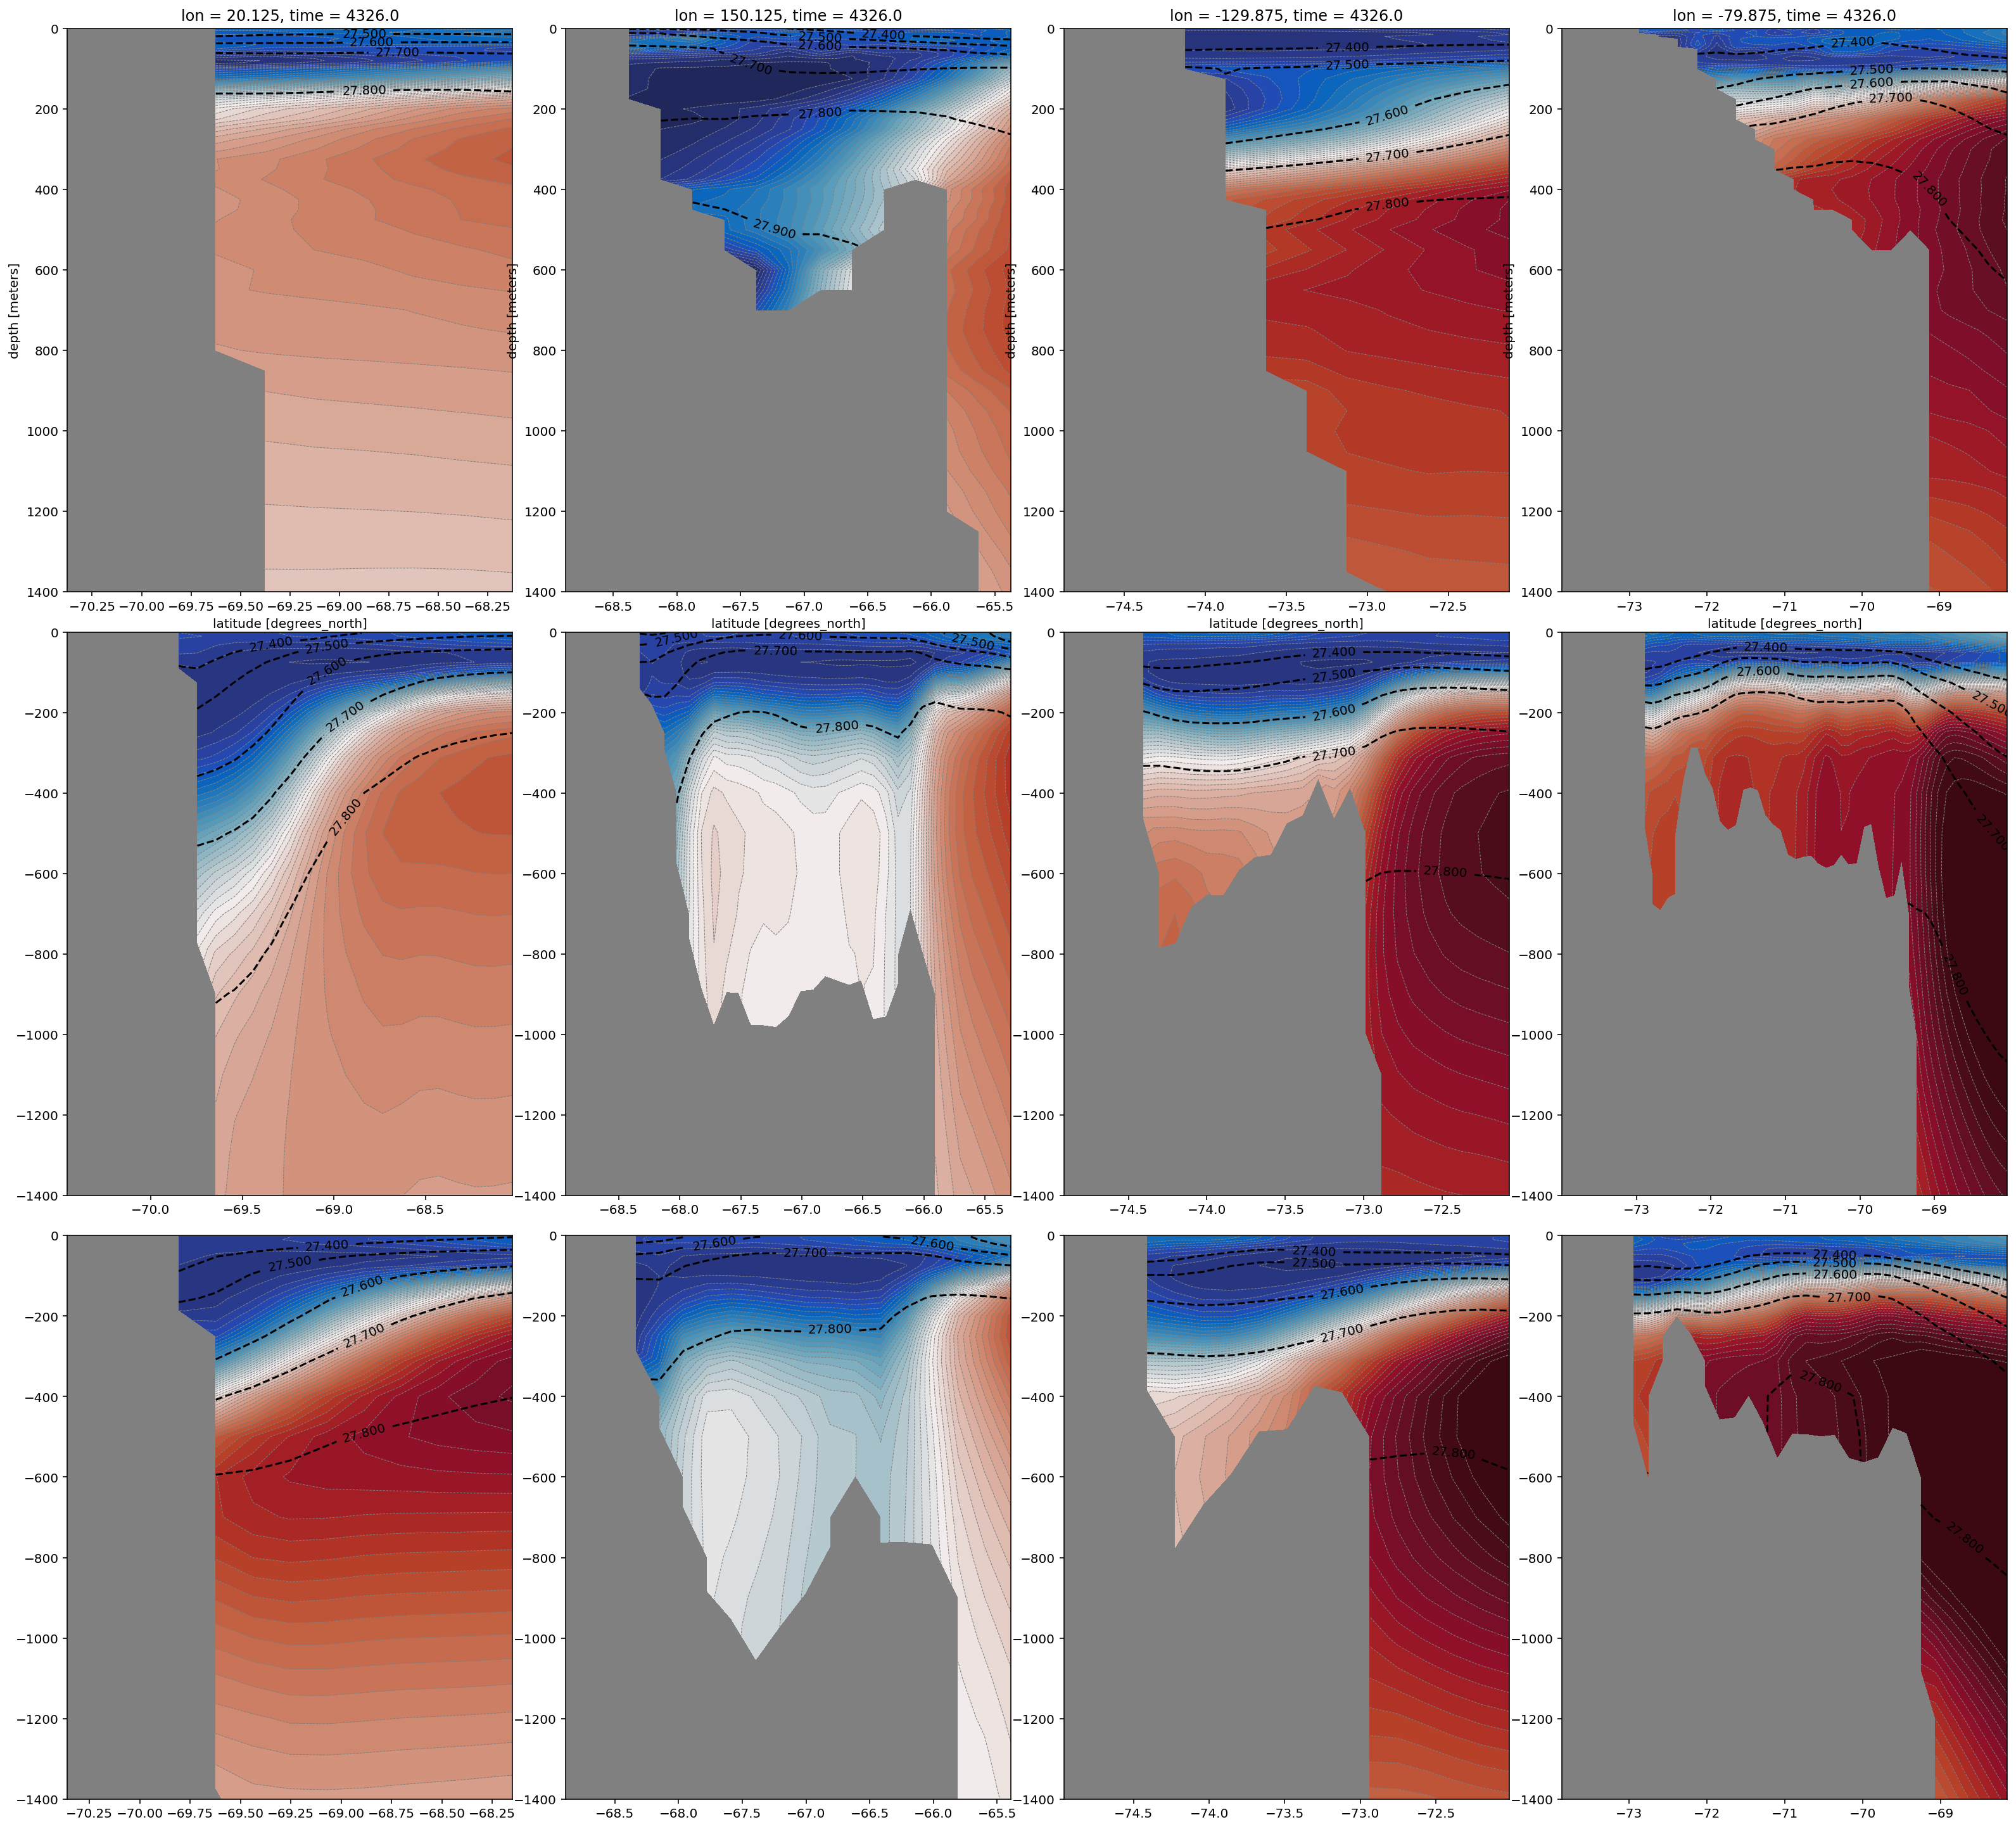

In [190]:
### Plots of WOA18, CM4, ESM4 at ASC cross-sections

potorho_piControl_cm4 = ds_potorho_cm4_piControl.poto_rho_ref_surface_cm4 - 1000
potorho_piControl_esm4 = ds_potorho_esm4_piControl.poto_rho_ref_surface_esm4 - 1000

f, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12)) = plt.subplots(ncols=4,nrows=3,figsize=(22,20),subplot_kw=dict(facecolor='grey'))
plt.tight_layout()

custom_ylim = (-1400,0)

plt.setp(ax1, ylim=custom_ylim)
plt.setp(ax2, ylim=custom_ylim)
plt.setp(ax3, ylim=custom_ylim)
plt.setp(ax4, ylim=custom_ylim)
plt.setp(ax5, ylim=custom_ylim)
plt.setp(ax6, ylim=custom_ylim)
plt.setp(ax7, ylim=custom_ylim)
plt.setp(ax8, ylim=custom_ylim)
plt.setp(ax9, ylim=custom_ylim)
plt.setp(ax10, ylim=custom_ylim)
plt.setp(ax11, ylim=custom_ylim)
plt.setp(ax12, ylim=custom_ylim)

levels_thetao = np.linspace(-2,2,60)
levels_thetao_contour = np.linspace(-2,2,60)

### 1st row: WOA18 cross-sections
ds_woa18_T.t_an.squeeze().sel(lat=slice(-70.5,-68)).sel(lon=20,method='nearest').plot.contourf(ax=ax1,\
                                                                                              cmap=cmocean.cm.balance,\
                                                                                              levels=levels_thetao,\
                                                                                              extend='both',\
                                                                                              yincrease=False,\
                                                                                              ylim=(1400,0),\
                                                                                              add_colorbar=False)
ds_woa18_T.t_an.squeeze().sel(lat=slice(-69,-65.2)).sel(lon=150,method='nearest').plot.contourf(ax=ax2,\
                                                                                              cmap=cmocean.cm.balance,\
                                                                                              levels=levels_thetao,\
                                                                                              extend='both',\
                                                                                              yincrease=False,\
                                                                                              ylim=(1400,0),\
                                                                                              add_colorbar=False)
ds_woa18_T.t_an.squeeze().sel(lat=slice(-75,-72)).sel(lon=-130,method='nearest').plot.contourf(ax=ax3,\
                                                                                              cmap=cmocean.cm.balance,\
                                                                                              levels=levels_thetao,\
                                                                                              extend='both',\
                                                                                              yincrease=False,\
                                                                                              ylim=(1400,0),\
                                                                                              add_colorbar=False)
ds_woa18_T.t_an.squeeze().sel(lat=slice(-74,-68)).sel(lon=-80,method='nearest').plot.contourf(ax=ax4,\
                                                                                              cmap=cmocean.cm.balance,\
                                                                                              levels=levels_thetao,\
                                                                                              extend='both',\
                                                                                              yincrease=False,\
                                                                                              ylim=(1400,0),\
                                                                                              add_colorbar=False)

ds_woa18_T.t_an.squeeze().sel(lat=slice(-70.5,-68)).sel(lon=20,method='nearest').plot.contour(ax=ax1,\
                                                                                              levels=levels_thetao_contour,\
                                                                                              extend='both',\
                                                                                              yincrease=False,\
                                                                                              ylim=(1400,0),\
                                                                                              add_colorbar=False,
                                                                                              colors='grey',
                                                                                              linewidths=0.5,
                                                                                              linestyles='--')
ds_woa18_T.t_an.squeeze().sel(lat=slice(-69,-65.2)).sel(lon=150,method='nearest').plot.contour(ax=ax2,\
                                                                                              levels=levels_thetao,\
                                                                                              extend='both',\
                                                                                              yincrease=False,\
                                                                                              ylim=(1400,0),\
                                                                                              add_colorbar=False,
                                                                                              colors='grey',
                                                                                              linewidths=0.5,
                                                                                              linestyles='--')
ds_woa18_T.t_an.squeeze().sel(lat=slice(-75,-72)).sel(lon=-130,method='nearest').plot.contour(ax=ax3,\
                                                                                              levels=levels_thetao,\
                                                                                              extend='both',\
                                                                                              yincrease=False,\
                                                                                              ylim=(1400,0),\
                                                                                              add_colorbar=False,
                                                                                              colors='grey',
                                                                                              linewidths=0.5,
                                                                                              linestyles='--')
ds_woa18_T.t_an.squeeze().sel(lat=slice(-74,-68)).sel(lon=-80,method='nearest').plot.contour(ax=ax4,\
                                                                                              levels=levels_thetao,\
                                                                                              extend='both',\
                                                                                              yincrease=False,\
                                                                                              ylim=(1400,0),\
                                                                                              add_colorbar=False,
                                                                                              colors='grey',
                                                                                              linewidths=0.5,
                                                                                              linestyles='--')


a = pdens_woa18.squeeze().sel(lat=slice(-70.5,-68)).sel(lon=20,method='nearest').plot.contour(ax=ax1,yincrease=False,
                                                                                              ylim = (1400,0),\
                                                                                              colors='black',\
                                                                                              linestyles='--',\
                                                                                              linewidths=1.5,\
                                                                                              levels=[27.40,27.50,27.60,27.70,27.80,27.90,28.00])
                                                                                              
b = pdens_woa18.squeeze().sel(lat=slice(-69,-65.2)).sel(lon=150,method='nearest').plot.contour(ax=ax2,yincrease=False,
                                                                                              ylim = (1400,0),\
                                                                                              colors='black',\
                                                                                              linestyles='--',\
                                                                                              linewidths=1.5,\
                                                                                              levels=[27.40,27.50,27.60,27.70,27.80,27.90,28.00])   

c = pdens_woa18.squeeze().sel(lat=slice(-75,-72)).sel(lon=-130,method='nearest').plot.contour(ax=ax3,yincrease=False,
                                                                                              ylim = (1400,0),\
                                                                                              colors='black',\
                                                                                              linestyles='--',\
                                                                                              linewidths=1.5,\
                                                                                              levels=[27.40,27.50,27.60,27.70,27.80,27.90,28.00])                                                                                              


d = pdens_woa18.squeeze().sel(lat=slice(-74,-68)).sel(lon=-80,method='nearest').plot.contour(ax=ax4,yincrease=False,
                                                                                              ylim = (1400,0),\
                                                                                              colors='black',\
                                                                                              linestyles='--',\
                                                                                              linewidths=1.5,\
                                                                                              levels=[27.40,27.50,27.60,27.70,27.80,27.90,28.00])                                                                                              


###############################

### 2nd row: CM4 cross-sections
ax5.contourf(cm4_piControl_true_bathy_20e[1],-cm4_piControl_true_bathy_20e[0],\
             ds_thetao_cm4_piControl.thetao.sel(yh=slice(-70.5,-68)).sel(xh=20,method='nearest').values,\
             cmap=cmocean.cm.balance,levels=levels_thetao,extend='both')
ax6.contourf(cm4_piControl_true_bathy_150e[1],-cm4_piControl_true_bathy_150e[0],\
             ds_thetao_cm4_piControl.thetao.sel(yh=slice(-69,-65.2)).sel(xh=-210,method='nearest').values,\
             cmap=cmocean.cm.balance,levels=levels_thetao,extend='both')    
ax7.contourf(cm4_piControl_true_bathy_130w[1],-cm4_piControl_true_bathy_130w[0],\
             ds_thetao_cm4_piControl.thetao.sel(yh=slice(-75,-72)).sel(xh=-130,method='nearest').values,\
             cmap=cmocean.cm.balance,levels=levels_thetao,extend='both')      
ax8.contourf(cm4_piControl_true_bathy_80w[1],-cm4_piControl_true_bathy_80w[0],\
             ds_thetao_cm4_piControl.thetao.sel(yh=slice(-74,-68)).sel(xh=-80,method='nearest').values,\
             cmap=cmocean.cm.balance,levels=levels_thetao,extend='both')      
ax5.contour(cm4_piControl_true_bathy_20e[1],-cm4_piControl_true_bathy_20e[0],\
             ds_thetao_cm4_piControl.thetao.sel(yh=slice(-70.5,-68)).sel(xh=20,method='nearest').values,\
             colors='grey',linewidths=0.50,linestyles='--',levels=levels_thetao_contour,extend='both')
ax6.contour(cm4_piControl_true_bathy_150e[1],-cm4_piControl_true_bathy_150e[0],\
             ds_thetao_cm4_piControl.thetao.sel(yh=slice(-69,-65.2)).sel(xh=-210,method='nearest').values,\
             colors='grey',linewidths=0.50,linestyles='--',levels=levels_thetao_contour,extend='both')    
ax7.contour(cm4_piControl_true_bathy_130w[1],-cm4_piControl_true_bathy_130w[0],\
             ds_thetao_cm4_piControl.thetao.sel(yh=slice(-75,-72)).sel(xh=-130,method='nearest').values,\
             colors='grey',linewidths=0.50,linestyles='--',levels=levels_thetao_contour,extend='both')      
ax8.contour(cm4_piControl_true_bathy_80w[1],-cm4_piControl_true_bathy_80w[0],\
             ds_thetao_cm4_piControl.thetao.sel(yh=slice(-74,-68)).sel(xh=-80,method='nearest').values,\
             colors='grey',linewidths=0.50,linestyles='--',levels=levels_thetao_contour,extend='both')      
    
e = ax5.contour(cm4_piControl_true_bathy_20e[1],-cm4_piControl_true_bathy_20e[0],\
            potorho_piControl_cm4.sel(yh=slice(-70.5,-68)).sel(xh=20,method='nearest').values,\
            colors='black',linestyles='--',linewidths=1.5,levels=[27.40,27.50,27.60,27.70,27.80,27.90,28.00])
f = ax6.contour(cm4_piControl_true_bathy_150e[1],-cm4_piControl_true_bathy_150e[0],\
            potorho_piControl_cm4.sel(yh=slice(-69,-65.2)).sel(xh=-210,method='nearest').values,\
            colors='black',linestyles='--',linewidths=1.5,levels=[27.40,27.50,27.60,27.70,27.80,27.90,28.00])    
g = ax7.contour(cm4_piControl_true_bathy_130w[1],-cm4_piControl_true_bathy_130w[0],\
            potorho_piControl_cm4.sel(yh=slice(-75,-72)).sel(xh=-130,method='nearest').values,\
            colors='black',linestyles='--',linewidths=1.5,levels=[27.40,27.50,27.60,27.70,27.80,27.90,28.00])  
h = ax8.contour(cm4_piControl_true_bathy_80w[1],-cm4_piControl_true_bathy_80w[0],\
            potorho_piControl_cm4.sel(yh=slice(-74,-68)).sel(xh=-80,method='nearest').values,\
            colors='black',linestyles='--',linewidths=1.5,levels=[27.40,27.50,27.60,27.70,27.80,27.90,28.00])  

#################################
    
### 3rd row: ESM4 cross-sections   
ax9.contourf(esm4_piControl_true_bathy_20e[1],-esm4_piControl_true_bathy_20e[0],\
             ds_thetao_esm4_piControl.thetao.sel(yh=slice(-70.5,-68)).sel(xh=20,method='nearest').values,\
             cmap=cmocean.cm.balance,levels=levels_thetao,extend='both')
ax10.contourf(esm4_piControl_true_bathy_150e[1],-esm4_piControl_true_bathy_150e[0],\
             ds_thetao_esm4_piControl.thetao.sel(yh=slice(-69,-65.2)).sel(xh=-210,method='nearest').values,\
             cmap=cmocean.cm.balance,levels=levels_thetao,extend='both')    
ax11.contourf(esm4_piControl_true_bathy_130w[1],-esm4_piControl_true_bathy_130w[0],\
             ds_thetao_esm4_piControl.thetao.sel(yh=slice(-75,-72)).sel(xh=-130,method='nearest').values,\
             cmap=cmocean.cm.balance,levels=levels_thetao,extend='both')      
ax12.contourf(esm4_piControl_true_bathy_80w[1],-esm4_piControl_true_bathy_80w[0],\
             ds_thetao_esm4_piControl.thetao.sel(yh=slice(-74,-68)).sel(xh=-80,method='nearest').values,\
             cmap=cmocean.cm.balance,levels=levels_thetao,extend='both')      
ax9.contour(esm4_piControl_true_bathy_20e[1],-esm4_piControl_true_bathy_20e[0],\
             ds_thetao_esm4_piControl.thetao.sel(yh=slice(-70.5,-68)).sel(xh=20,method='nearest').values,\
             colors='grey',linewidths=0.50,linestyles='--',levels=levels_thetao_contour,extend='both')
ax10.contour(esm4_piControl_true_bathy_150e[1],-esm4_piControl_true_bathy_150e[0],\
             ds_thetao_esm4_piControl.thetao.sel(yh=slice(-69,-65.2)).sel(xh=-210,method='nearest').values,\
             colors='grey',linewidths=0.50,linestyles='--',levels=levels_thetao_contour,extend='both')    
ax11.contour(esm4_piControl_true_bathy_130w[1],-esm4_piControl_true_bathy_130w[0],\
             ds_thetao_esm4_piControl.thetao.sel(yh=slice(-75,-72)).sel(xh=-130,method='nearest').values,\
             colors='grey',linewidths=0.50,linestyles='--',levels=levels_thetao_contour,extend='both')      
ax12.contour(esm4_piControl_true_bathy_80w[1],-esm4_piControl_true_bathy_80w[0],\
             ds_thetao_esm4_piControl.thetao.sel(yh=slice(-74,-68)).sel(xh=-80,method='nearest').values,\
             colors='grey',linewidths=0.50,linestyles='--',levels=levels_thetao_contour,extend='both')
    
i = ax9.contour(esm4_piControl_true_bathy_20e[1],-esm4_piControl_true_bathy_20e[0],\
            potorho_piControl_esm4.sel(yh=slice(-70.5,-68)).sel(xh=20,method='nearest').values,\
            colors='black',linestyles='--',linewidths=1.5,levels=[27.40,27.50,27.60,27.70,27.80,27.90,28.00])
j = ax10.contour(esm4_piControl_true_bathy_150e[1],-esm4_piControl_true_bathy_150e[0],\
            potorho_piControl_esm4.sel(yh=slice(-69,-65.2)).sel(xh=-210,method='nearest').values,\
            colors='black',linestyles='--',linewidths=1.5,levels=[27.40,27.50,27.60,27.70,27.80,27.90,28.00])    
k = ax11.contour(esm4_piControl_true_bathy_130w[1],-esm4_piControl_true_bathy_130w[0],\
            potorho_piControl_esm4.sel(yh=slice(-75,-72)).sel(xh=-130,method='nearest').values,\
            colors='black',linestyles='--',linewidths=1.5,levels=[27.40,27.50,27.60,27.70,27.80,27.90,28.00])  
l = ax12.contour(esm4_piControl_true_bathy_80w[1],-esm4_piControl_true_bathy_80w[0],\
            potorho_piControl_esm4.sel(yh=slice(-74,-68)).sel(xh=-80,method='nearest').values,\
            colors='black',linestyles='--',linewidths=1.5,levels=[27.40,27.50,27.60,27.70,27.80,27.90,28.00])     

    
ax1.clabel(a,inline=True)
ax2.clabel(b,inline=True)
ax3.clabel(c,inline=True)
ax4.clabel(d,inline=True)
ax5.clabel(e,inline=True)
ax6.clabel(f,inline=True)
ax7.clabel(g,inline=True)
ax8.clabel(h,inline=True)
ax9.clabel(i,inline=True)
ax10.clabel(j,inline=True)
ax11.clabel(k,inline=True)
ax12.clabel(l,inline=True)